회귀직선
==
붓꽃 데이터 , 
--
- 꽃받침(sepal) 길이를 보고 꽃잎(petal) 길이를 예측

성별에 따른 몸무게 예측
--
- 키로부터 몸무게 예측

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split

In [4]:
from sklearn import datasets 
iris = datasets.load_iris() 
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [6]:
X_all = iris.data 
X_all[:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [7]:
X = X_all[:, 0] 
y = X_all[:, 2]
print(X[0:5])
print(y[0:5])

[5.1 4.9 4.7 4.6 5. ]
[1.4 1.4 1.3 1.5 1.4]


Text(0, 0.5, 'Petal length')

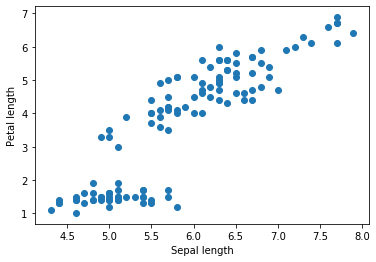

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(X_train, y_train, marker='o') 
plt.xlabel("Sepal length") 
plt.ylabel("Petal length")

#### LinearRegression()
- fit(), predict(), score() : x 입력의 차원(2차원)

In [9]:
from sklearn.linear_model import LinearRegression 

linr = LinearRegression()
linr.fit(X_train.reshape(-1,1), y_train)
print("Score : {:.3f}".format(linr.score(X_test.reshape(-1,1), y_test)))


Score : 0.655


In [10]:
print(linr.coef_) 
print(linr.intercept_)

[1.8699969]
-7.233315234253802


- "k-" : color - marker - line style

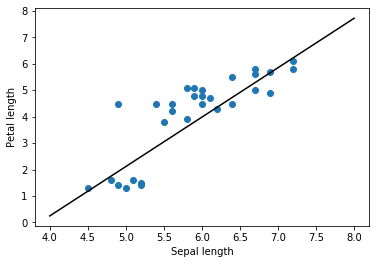

In [11]:
plt.scatter(X_test, y_test, marker='o') 
plt.xlabel("Sepal length")
plt.ylabel("Petal length")

XX = np.linspace(4, 8, 200)
plt.plot(XX, linr.coef_ * XX + linr.intercept_, "k-")

## 몸무게 예측
- 키로부터 몸무게 예측

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split

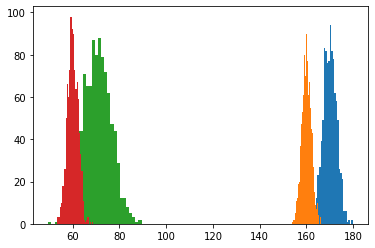

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split

n_samples = 1000
x1 = 3*np.random.randn(n_samples) + 170
x2 = 2*np.random.randn(n_samples) + 160

y1 = 2*x1 - 270 + 2*np.random.randn(n_samples) # 평균 70kg
y2 = 1*x2 - 100 + np.random.randn(n_samples) # 평균 60kg
plt.hist(x1, bins=30)
plt.hist(x2, bins=30)

plt.hist(y1, bins=30)
plt.hist(y2, bins=30)
plt.show()

### 남자 데이터에 대해서만

In [13]:
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2)
leg1 = LinearRegression()
leg1.fit(X_train.reshape(-1,1), y_train)

print(leg1.coef_)
print(leg1.intercept_)
print(leg1.score(X_test.reshape(-1,1), y_test))

[2.0052202]
-270.90343922934926
0.9215932363527239


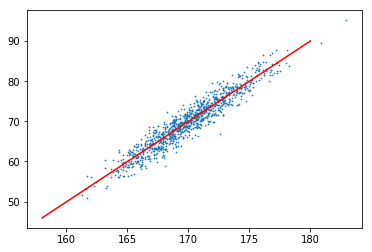

In [16]:
xs = np.linspace(158,180,10)
ys = xs * leg1.coef_[0] + leg1.intercept_
plt.scatter(x1, y1, s=0.5)
plt.plot(xs, ys, c='r')

### 여자 데이터에 대해서만

In [17]:
X_train, X_test, y_train, y_test = train_test_split(x2, y2, test_size=0.2)
leg1 = LinearRegression()
leg1.fit(X_train.reshape(-1,1), y_train)

print(leg1.coef_)
print(leg1.intercept_)
print(leg1.score(X_test.reshape(-1,1), y_test))

[1.00878486]
-101.4250783839462
0.8473534477972877


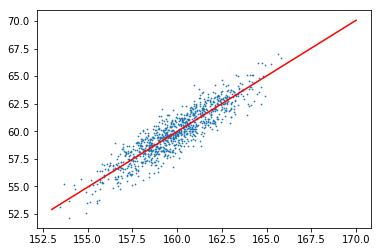

In [18]:
xs = np.linspace(153,170,10)
ys = xs * leg1.coef_[0] + leg1.intercept_
plt.scatter(x2, y2, s=0.5)
plt.plot(xs, ys, c='r')

### 남자, 여자 데이터를 합하여

In [15]:
x = np.concatenate((x1, x2))
y = np.concatenate((y1, y2))

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
leg1 = LinearRegression()
leg1.fit(X_train.reshape(-1,1), y_train)

print(leg1.coef_)
print(leg1.intercept_)
print(leg1.score(X_test.reshape(-1,1), y_test))

[1.14271358]
-123.54134565995548
0.8738737815133479


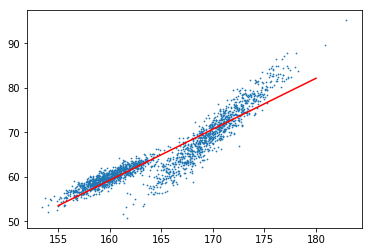

In [22]:
xs = np.linspace(155,180,10)
ys = xs * leg1.coef_[0] + leg1.intercept_
plt.scatter(x,y, s=0.5)
plt.plot(xs, ys, c='r')

## 성별 컬럼을 추가
- y = a*x_1 + b*x_2 + c

- ignore_index=True
    - 기존 index를 무시하고, 새로 indexing한다
    - 아니면 0, 1, 2, 0, 1 ... 이런 식으로 기존 index 유지

In [16]:
X1 = pd.DataFrame({'height':x1, 'sex':0})
X2 = pd.DataFrame({'height':x2, 'sex':1})
X = pd.concat([X1, X2], ignore_index=True)
X

,height,sex
0,168.456497,0
1,171.011724,0
2,167.452758,0
3,169.445080,0
4,164.489855,0
...,...,...
1995,157.485836,1
1996,160.378369,1
1997,159.295610,1
1998,161.879968,1


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
leg = LinearRegression()
leg.fit(X_train, y_train)

print(leg.coef_)
print(leg.intercept_)
print(leg.score(X_test, y_test))

[1.68449055 6.64393327]
-216.27392187571303
0.9179934443310658


In [26]:
X_train[:10]

,height,sex
1255,157.530440,1
912,172.004636,0
106,171.634485,0
896,168.015997,0
164,170.613174,0
791,169.677692,0
1039,161.289456,1
1368,160.440011,1
1315,160.581566,1
1431,160.551232,1


- 위의 결과 : coef_[0] \* 키 + coef_[1] \* 성별 + intercept_
- 정확도가 높아졌다

## 교재 p.241 ---- 여기 까지

## 교차검증

In [26]:
# from sklearn.cross_validation import cross_val_score, KFold
from sklearn.model_selection import cross_val_score, KFold

In [27]:
X.shape[1]

2

In [29]:
# cross_val = KFold(X.shape[0], 10, shuffle=True)
cross_val = KFold(10, shuffle=True)
print(cross_val_score(leg, X, y, cv=cross_val))

[0.90631457 0.91503056 0.91547829 0.91661833 0.92371295 0.9333411
 0.90698517 0.91024565 0.91890638 0.91599967]


## 결정트리를 이용한 회귀 (뒤에서 설명함)

In [30]:
from sklearn.tree import DecisionTreeRegressor 
dec_reg = DecisionTreeRegressor()
dec_reg.fit(X_train, y_train) 
print(dec_reg.score(X_test, y_test))

0.8549141080765452
